In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from regressao_logistica import RegressaoLogistica
from sklearn.model_selection import train_test_split

In [90]:
from numpy import linalg as LA
import random


class RegressaoLogistica():
    def __init__(self, eta=0.1, tmax=1000, batch_size=32):
        self.eta = eta
        self.tmax = tmax
        self.batch_size = batch_size

    # Infere o vetor w da funçao hipotese
    #Executa a minimizao do erro de entropia cruzada pelo algoritmo gradiente de descida
    def fit(self, _X, _y):
        X = np.concatenate((np.ones((len(_X),1)), _X), axis=1) # X é uma matriz de amostras que eu adiciono uma coluna de 1s
        y = np.array(_y)
        
        d = X.shape[1] # Quantidade de colunas de X, ou seja, de caracteristicas
        N = X.shape[0] # Quantidade de amostras
        w = np.zeros(d, dtype=float) # Cria um array de zeros com o tamanho do numero de colunas de X
        self.w = []
        
        for i in range(self.tmax):
            vsoma = np.zeros(d, dtype=float)

            #Escolhendo o lote de entradas
            if self.batch_size < N:
                indices = random.sample(range(N),self.batch_size) # Escolhe aleatoriamente batch_size indices
                batchX = [X[index] for index in indices]
                batchY = [y[index] for index in indices]
            else:
                batchX = X
                batchY = y

            #computando o gradiente no ponto atual
            for xn, yn in zip(batchX, batchY):
                vsoma += (yn * xn) / (1 + np.exp((yn * w).T @ xn))
            
            gt = vsoma/self.batch_size
            w = w + (self.eta*gt)
            #Condicao de parada: se ||deltaF|| < epsilon (0.0001)
            if LA.norm(gt) < 0.0001 :
                break
            

        self.w = w
        print("w: ", self.w)
        

    #funcao hipotese inferida pela regressa logistica  
    def predict_prob(self, X):
        lista = []
        for x in X:
            #print(1 / (1 + np.exp(-(self.w[0] + np.dot(self.w[1:], x)))))
            lista.append(1 / (1 + np.exp(-(self.w[0] + np.dot(self.w[1:], x)))))
        return lista
        #return [1 / (1 + np.exp(-(self.w[0] + np.dot(self.w[1:], x)))) for x in X]

    #Predicao por classificação linear
    def predict(self, X):
        lista = []
        for x in X:
            print(1 / (1 + np.exp(-(self.w[0] + self.w[1:].T @ x))))
            if (1 / (1 + np.exp(-(self.w[0] + self.w[1:].T @ x)))) >= 0.5:
                
                lista.append(1)
            else:
                lista.append(-1)
        return lista
        #return [1 if (1 / (1 + np.exp(-(self.w[0] + self.w[1:].T @ x)))) >= 0.5 
                #else -1 for x in X]

    def getW(self):
        return self.w

    def getRegressionY(self, regressionX, shift=0):
        return (-self.w[0]+shift - self.w[1]*regressionX) / self.w[2]

In [48]:
dataframe_treino = pd.read_csv('train_reduzido_1_5.csv', sep=';')
dataframe_teste = pd.read_csv('test_reduzido_1_5.csv', sep=';')

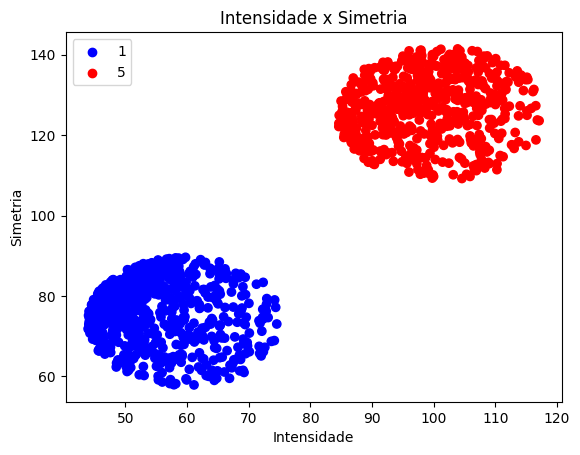

In [49]:
# Plotando o grafico intensidade x simetria do conjunto de treino
cores = {1: 'blue', 5: 'red'}
plt.scatter(dataframe_treino['intensidade'], dataframe_treino['simetria'], c=dataframe_treino['label'].map(cores))
plt.xlabel('Intensidade')
plt.ylabel('Simetria')
plt.title('Intensidade x Simetria')
for label, cor in cores.items():
    plt.scatter([], [], color=cor, label=label)
plt.legend()
plt.show()


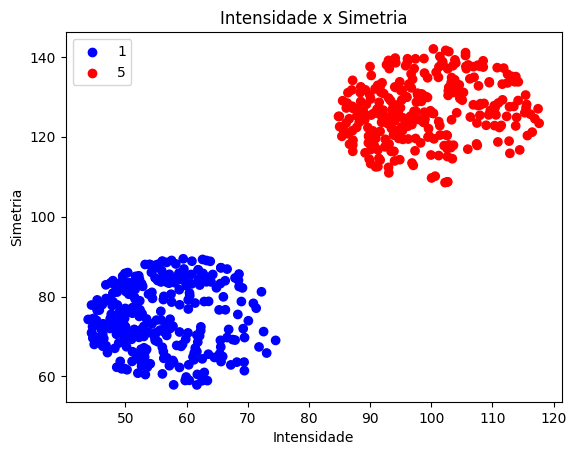

In [50]:
# Plotando o grafico intensidade x simetria do conjunto de teste
cores = {1: 'blue', 5: 'red'}

plt.scatter(dataframe_teste['intensidade'], dataframe_teste['simetria'], c=dataframe_teste['label'].map(cores))
plt.xlabel('Intensidade')
plt.ylabel('Simetria')
plt.title('Intensidade x Simetria')
for label, cor in cores.items():
    plt.scatter([], [], color=cor, label=label)
plt.legend()
plt.show()

C:\Users\Bergson\AppData\Local\Temp\ipykernel_10116\1068149124.py:36: RuntimeWarning: overflow encountered in exp
  vsoma += (yn * xn) / (1 + np.exp((yn * w).T @ xn))


w:  [ 0.14375    13.10699142 16.80064951]
y_pred:  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0

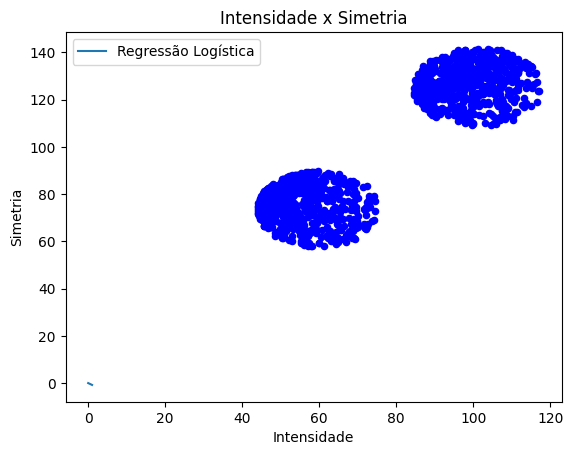

In [91]:
classificador = RegressaoLogistica()
# Transformando os dados X e Y em numpy arrays
X = dataframe_treino[['intensidade', 'simetria']].to_numpy()
y = dataframe_treino['label'].to_numpy()
classificador.fit(X, y)
y_pred = classificador.predict_prob(X)
print("y_pred: ", y_pred)

# Plotando a reta gerada pela regressao logistica
x = np.linspace(0, 1, 100)
y_plot = classificador.getRegressionY(x)
plt.plot(x, y_plot, label='Regressão Logística')
plt.xlabel('Intensidade')
plt.ylabel('Simetria')
plt.title('Intensidade x Simetria')
plt.legend()

#plota os pontos classificados pela RL com bolinha azul(+) e vermelha(-)
xP = [X[i][0] for i in range(X.shape[0]) if(y_pred[i] >= 0.5)]
yP = [X[i][1] for i in range(X.shape[0]) if(y_pred[i] >= 0.5)]
xN = [X[i][0] for i in range(X.shape[0]) if(y_pred[i] < 0.5)]
yN = [X[i][1] for i in range(X.shape[0]) if(y_pred[i] < 0.5)]

plt.scatter(xP, yP, color='blue', marker='o', s=20)
plt.scatter(xN, yN, color='red', marker='o', s=20)

#Computando o erro dentro da amostra (Ein)
pred = classificador.predict(X)
#print("Pred: ", pred)
errorIN = 0
for pn, yn in zip(pred, y):
  if(pn != yn):
    errorIN += 1

print("Error in : " + str(errorIN/X.shape[0] * 100) + "%")

In [71]:
from sklearn.linear_model import LogisticRegression
N = X.shape[0]
classifier = LogisticRegression(max_iter=1000)
classifier.fit(X, y) 

#Plota as porcentagens da Regressao Logistica 
pred = classifier.predict_proba(X)
print(pred)
for valor in pred:
  if valor > 0.5:
    print("provavelmente 5")
  else:
    print("provavelmente 1")

#Computando o erro dentro da amostra (Ein)
pred = classifier.predict(X)
print(pred)
xP = [X[i][0] for i in range(N) if(pred[i] >= 0.5)]
yP = [X[i][1] for i in range(N) if(pred[i] >= 0.5)]
xN = [X[i][0] for i in range(N) if(pred[i] < 0.5)]
yN = [X[i][1] for i in range(N) if(pred[i] < 0.5)]

plt.scatter(xP, yP, color='blue', marker='o', s=20)
plt.scatter(xN, yN, color='red', marker='o', s=20)

errorIN = 0
for pn, yn in zip(pred, y):
  if(pn != yn):
    errorIN += 1

print("Error in : " + str(errorIN/X.shape[0] * 100) + "%")

[[9.99999998e-01 2.07270345e-09]
 [9.99981514e-01 1.84862551e-05]
 [9.99999826e-01 1.74447829e-07]
 ...
 [1.48311452e-09 9.99999999e-01]
 [4.85977293e-08 9.99999951e-01]
 [1.20950494e-09 9.99999999e-01]]


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()